In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Flatten

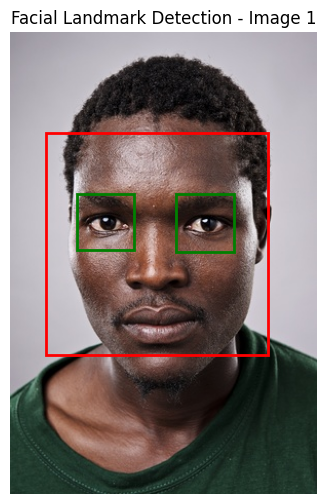

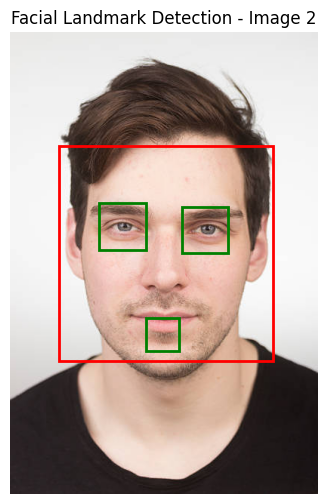

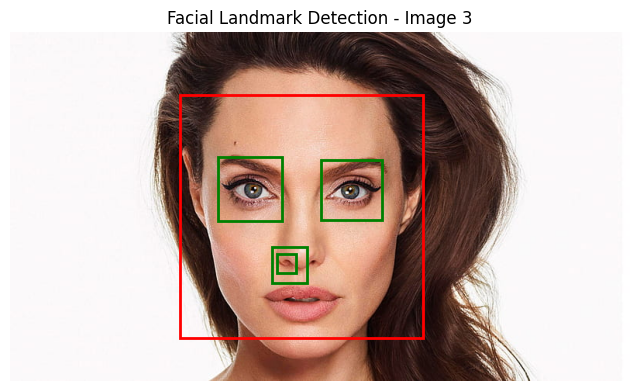

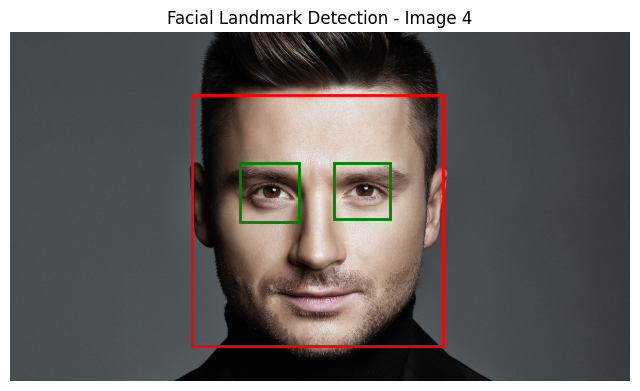

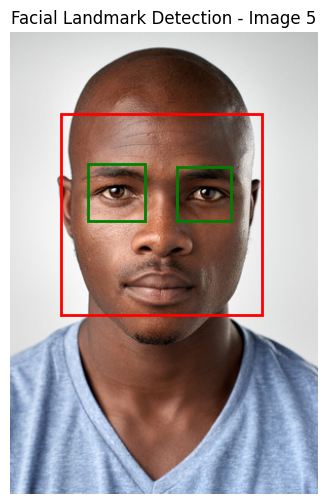

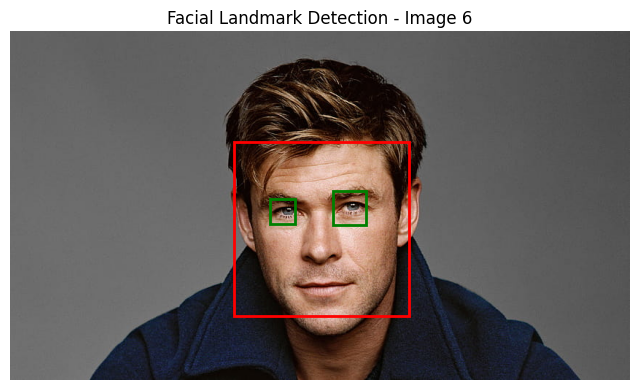

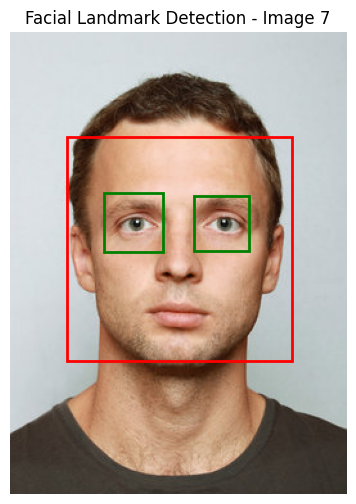

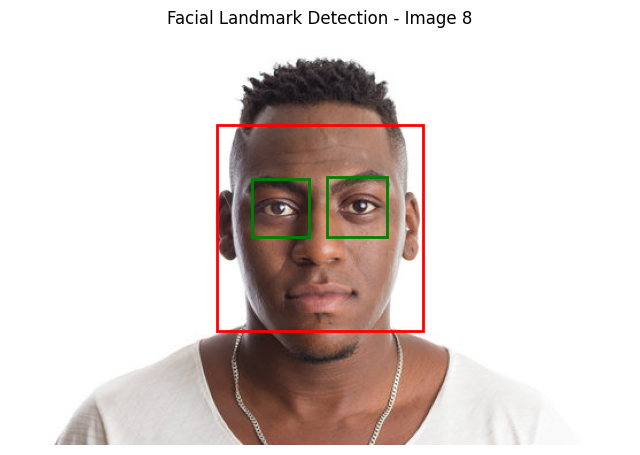

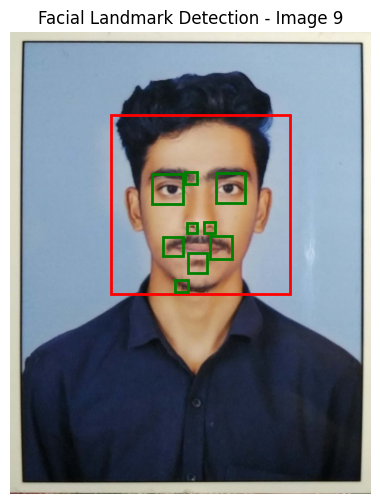

In [3]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# Load pre-trained models
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Process each image
for i in range(1, 10):  # Assuming image filenames are in the format image1.jpg, image2.jpg, ..., image9.jpg
    # Load an image
    image_path = f'/content/drive/MyDrive/face_images/{i}.jpg'  # Adjust the path according to your image filenames
    image = Image.open(image_path)
    gray = np.array(image.convert('L'))

    # Face detection
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Visualize the image
    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.axis('off')

    # Iterate over detected faces
    for (x, y, w, h) in faces:
        plt.gca().add_patch(plt.Rectangle((x, y), w, h, fill=False, edgecolor='r', linewidth=2))
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = np.array(image)[y:y+h, x:x+w]

        # Facial landmark detection
        eyes = eye_cascade.detectMultiScale(roi_gray)

        # Draw landmarks (in this case, eyes)
        for (ex, ey, ew, eh) in eyes:
            plt.gca().add_patch(plt.Rectangle((x+ex, y+ey), ew, eh, fill=False, edgecolor='g', linewidth=2))

    plt.title(f'Facial Landmark Detection - Image {i}')
    plt.show()


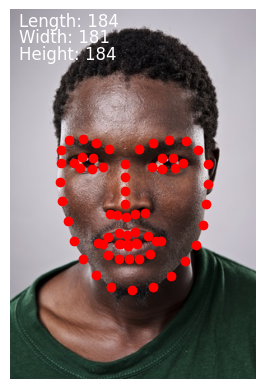

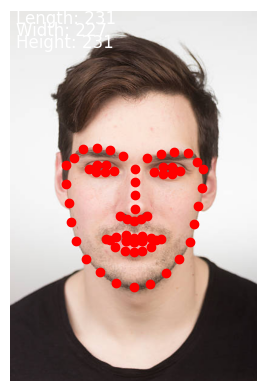

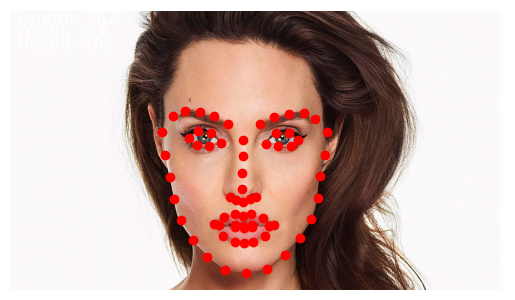

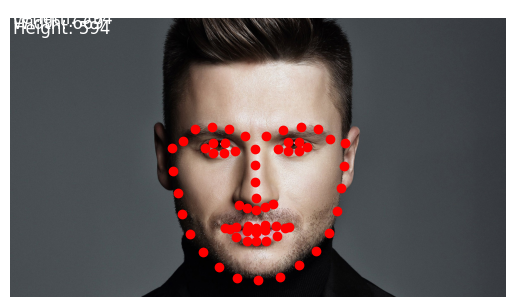

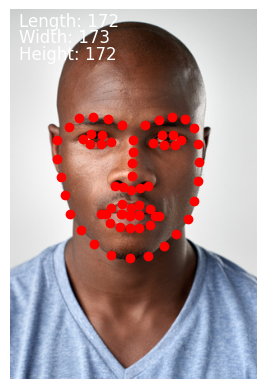

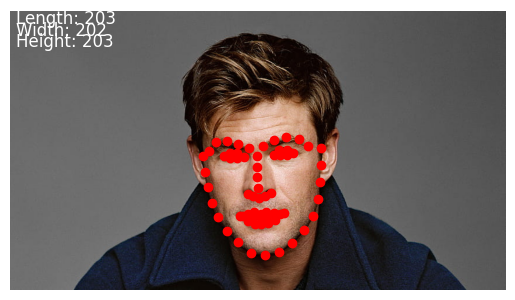

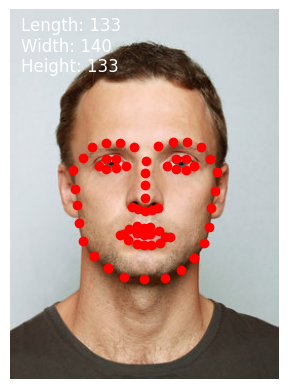

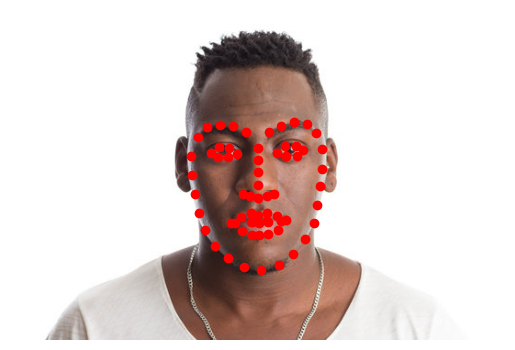

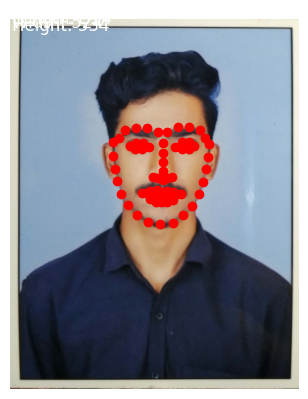

In [11]:
import dlib

# Load the facial landmark detector
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/drive/MyDrive/face_images/shape_predictor_68_face_landmarks.dat")  # Path to the pre-trained shape predictor

# Process each of your 9 images
for i in range(1, 10):
    # Load the image
    image_path = f'/content/drive/MyDrive/face_images/{i}.jpg'  # Adjust the path to your image filenames
    image = Image.open(image_path)

    # Convert image to grayscale
    gray = np.array(image.convert('L'))

    # Detect faces in the image
    faces = detector(gray)

    # Iterate over detected faces
    for face in faces:
        # Detect facial landmarks
        landmarks = predictor(gray, face)
        landmarks = np.array([(landmark.x, landmark.y) for landmark in landmarks.parts()])

        # Visualize the image with facial landmarks
        plt.imshow(image)
        plt.axis('off')

        # Plot the facial landmarks
        plt.scatter(landmarks[:, 0], landmarks[:, 1], color='red', marker='o')

        # Calculate and display facial dimensions
        length = np.max(landmarks[:, 1]) - np.min(landmarks[:, 1])
        width = np.max(landmarks[:, 0]) - np.min(landmarks[:, 0])
        height = np.max(landmarks[:, 1]) - np.min(landmarks[:, 1])

        plt.text(10, 20, f'Length: {length}', fontsize=12, color='white')
        plt.text(10, 40, f'Width: {width}', fontsize=12, color='white')
        plt.text(10, 60, f'Height: {height}', fontsize=12, color='white')

        plt.show()


In [12]:
# Define the target size for resizing
target_size = (256, 256)

# Process each of your 9 images
for i in range(1, 10):
    # Load the image
    image_path = f'/content/drive/MyDrive/face_images/{i}.jpg'  # Adjust the path to your image filenames
    image = Image.open(image_path)

    # Resize the image
    resized_image = image.resize(target_size)

    # Save or further process the resized image
    resized_image.save(f'resized_image_{i}.jpg')
